- model relationship between one or more features and a continuous target variable
- differs from classification (another supervised learning) in that regression aims to predice output on a continuous scale rather than categorical class labels

## Simple linear regression
- Linear model with one explnatory variable (feature)

$ y = w_0 + w_1x$

The goal of the regression algorithm is to learn the weights to describe the relationship between the explanatory variable and the target varaibles. 

## Multiple linear regression
- Linear model with multiple explanatory variables 

$y = w_0x_0 + w_1x_1 + .... + w_mx_m = \sum^m_{i=0}w_ix_i = w^Tx$

### Example: Housing market dataset

In [3]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                  'python-machine-learning-book-3rd-edition'
                  '/master/ch10/housing.data.txt',header=None,
                  sep='\s+')
    
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS',
              'NOX', 'RM', 'AGE', 'DIS', 'RAD',
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [16]:
df.columns[1:]

Index(['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

The correlation between different features in the dataset can be plotted in one place using the __scatterplot matrix__


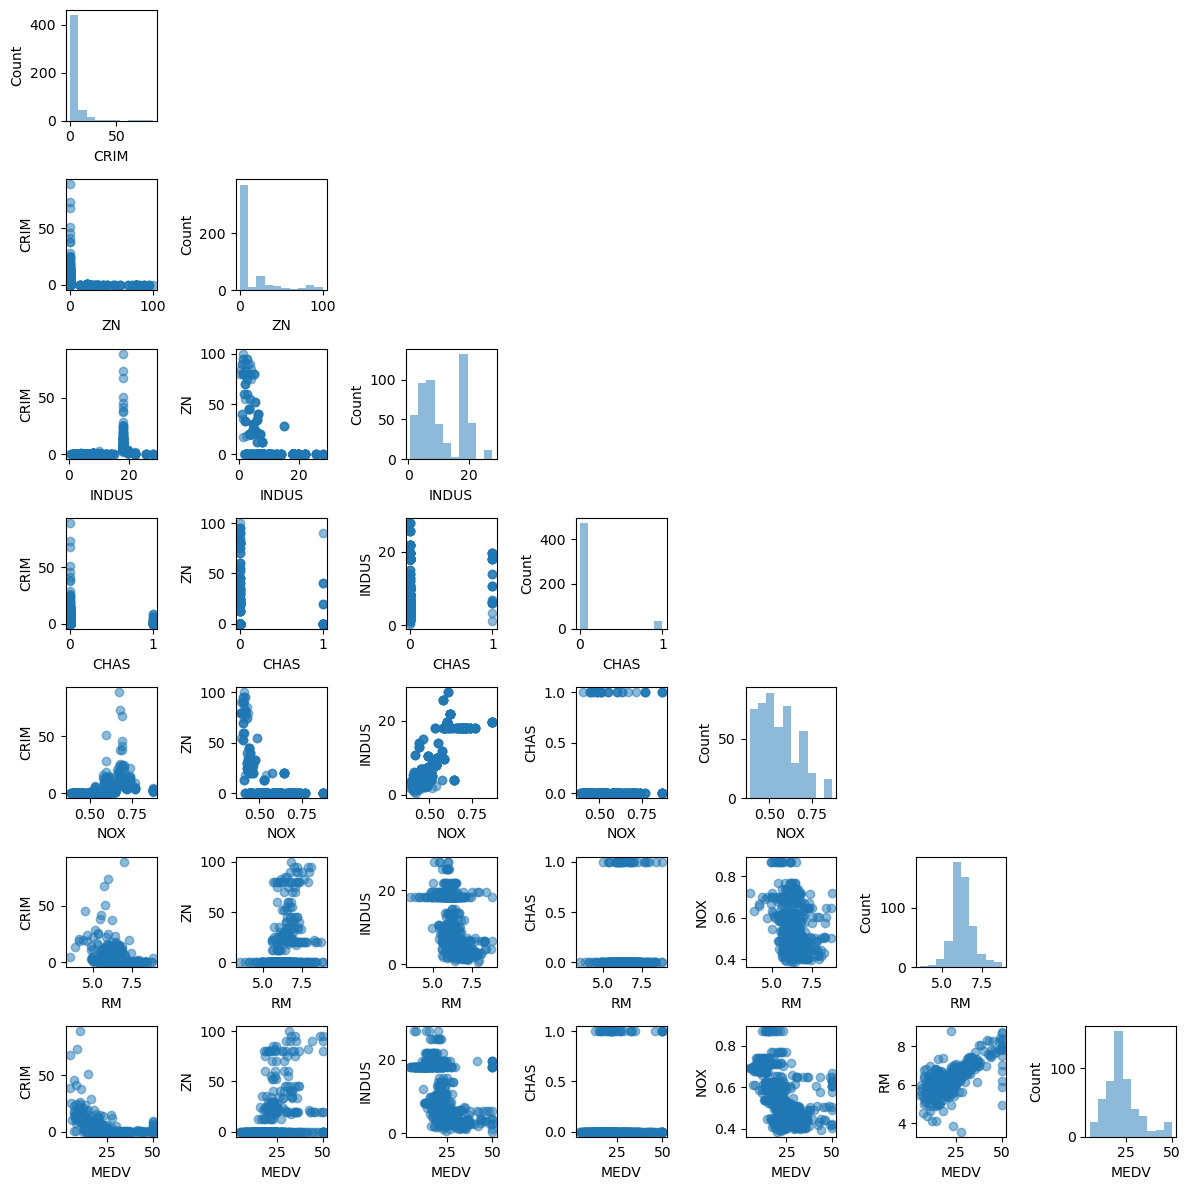

In [28]:
# %pip install mlxtend
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

# cols = ['CRIM','INDUS','NOX','RM','MEDV']
cols = ['CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'MEDV']
scatterplotmatrix(df[cols].values, figsize=(12,12), names=cols, alpha=0.5)

plt.tight_layout()
plt.show()

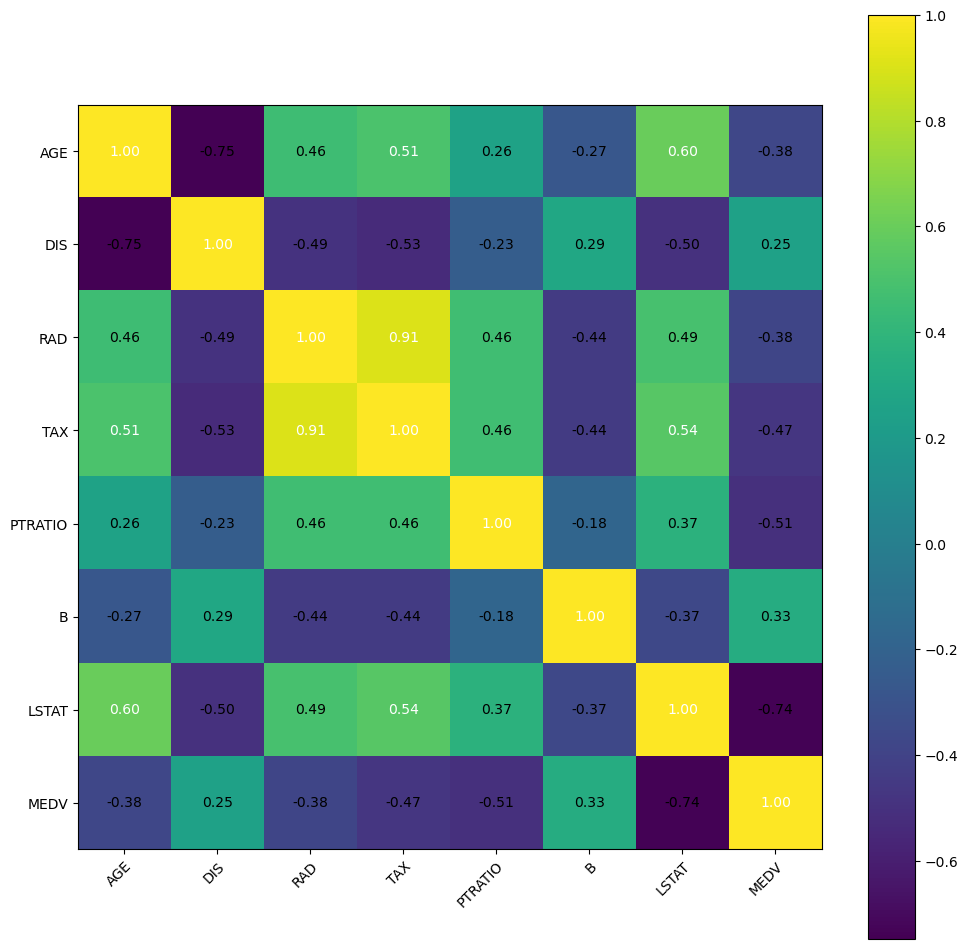

In [34]:
from mlxtend.plotting import heatmap
import numpy as np

cm = np.corrcoef(df[cols].values.T)

hm = heatmap(cm, row_names=cols,figsize=(12,12), column_names=cols)
plt.show()

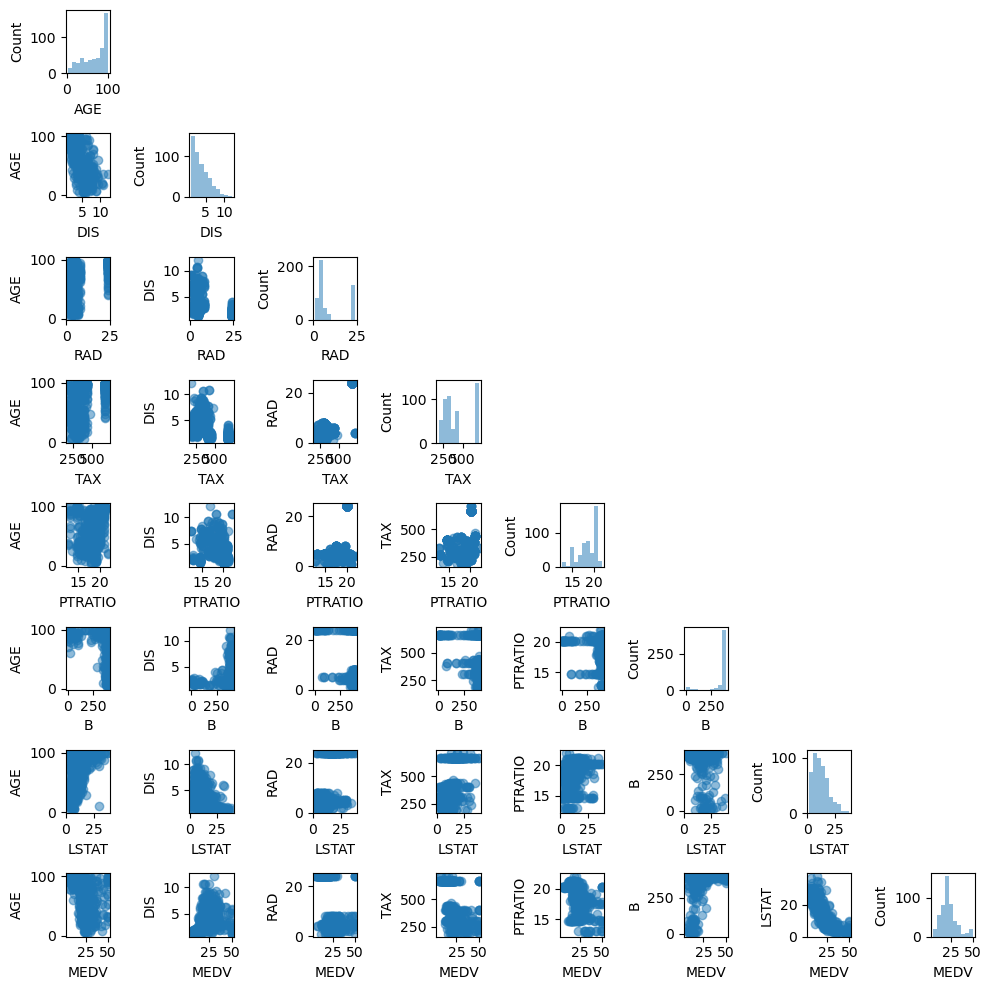

In [35]:
cols = ['AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT', 'MEDV']
scatterplotmatrix(df[cols].values, figsize=(10,10), names=cols, alpha=0.5)

plt.tight_layout()
plt.show()

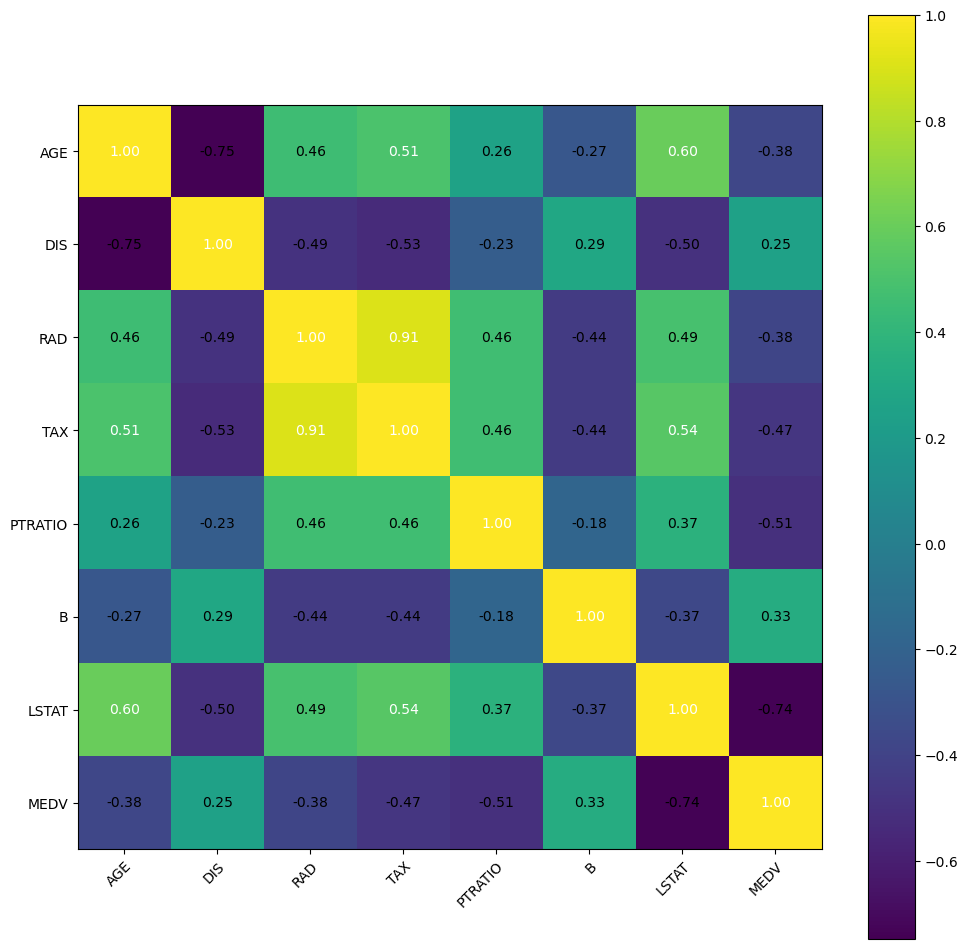

In [36]:
from mlxtend.plotting import heatmap
import numpy as np

cm = np.corrcoef(df[cols].values.T)

hm = heatmap(cm, row_names=cols,figsize=(12,12), column_names=cols)
plt.show()

- Correlation between RM and MEDV is high (0.70) and the relationship is linear
- Let us use RM as exploratory variable for simple linear regression

In [74]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()

slr.fit(X,y)
y_pred = slr.predict(X)

print("Fitted values")
print("Slope: %.3f" % slr.coef_[0])
print("Intercept: %.3f" % slr.intercept_)

Fitted values
Slope: 9.102
Intercept: -34.671


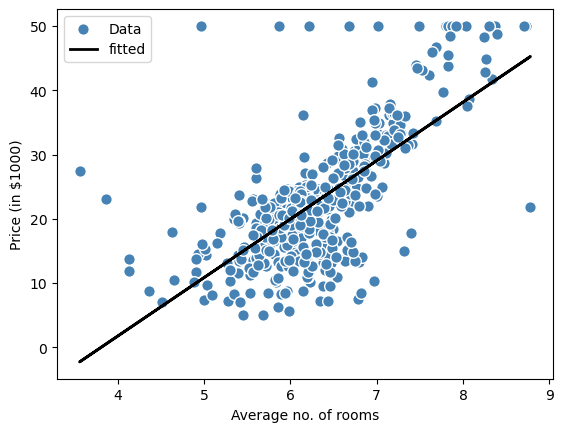

In [84]:
plt.scatter(X, y, c='steelblue', edgecolor='white', s=70, label='Data')
plt.plot(X, slr.predict(X), color='black', lw=2, label='fitted')


plt.legend()
plt.ylabel("Price (in $1000)")
plt.xlabel("Average no. of rooms")
plt.show()

- LR models are hugely affected by outliers
- Alternative to remove outliers: 
    - __RANdom SAmple Consensus (RANSAC)__: fits model to a subset of data called inliers

In [87]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(), max_trials=100,
                        min_samples =50, loss='absolute_error',
                        residual_threshold=5.0, 
                        random_state=0)

ransac.fit(X,y)

RANSACRegressor(estimator=LinearRegression(), min_samples=50, random_state=0,
                residual_threshold=5.0)

In [90]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3,10,1)
line_y_ransac = ransac.predict(line_X[:,np.newaxis])

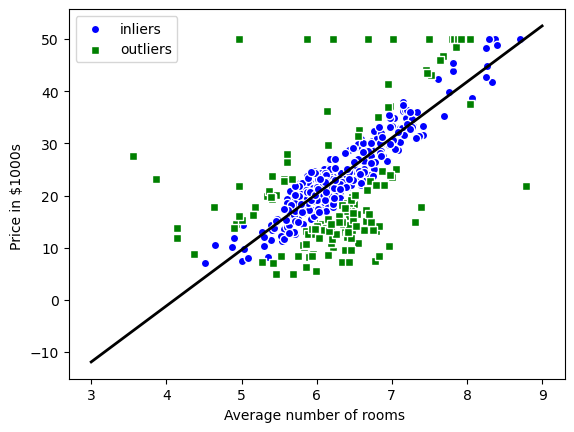

In [93]:
plt.scatter(X[inlier_mask],y[inlier_mask], c = 'b', edgecolor='w',
           marker='o', label="inliers")
plt.scatter(X[outlier_mask],y[outlier_mask], c = 'g', edgecolor='w',
           marker='s', label="outliers")

plt.plot(line_X, line_y_ransac, color='black', lw=2)
plt.xlabel('Average number of rooms ')
plt.ylabel('Price in $1000s ')
plt.legend(loc='upper left')
plt.show()

## Performance Analysis of Linear Regression Models

In [95]:
# Use all features from training

X = df.iloc[:, :-1].values
y = df['MEDV'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                        test_size=0.3, random_state=0)

slr = LinearRegression()
slr.fit(X_train, y_train)

y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

Now that we are working with multiple features, we cannot visualize the linear regression hyperplane. However, we can plot the residuals against the predicted values to measure the performance of our regression model.

__Residual plots__ are commonly used visual tool for evaluating performance of regression models

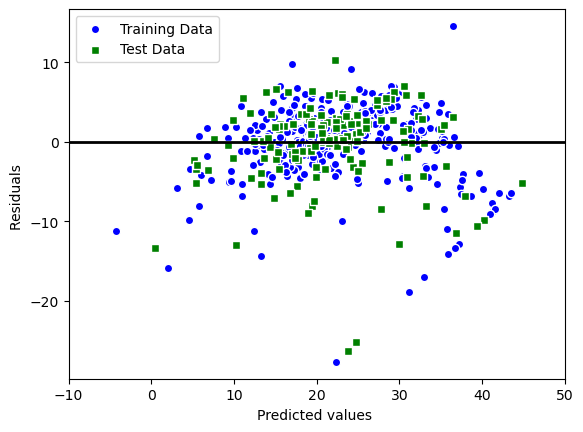

In [97]:
plt.scatter(y_train_pred, y_train_pred-y_train,c = 'b', marker='o',
           edgecolor='w', label='Training Data')
plt.scatter(y_test_pred, y_test_pred-y_test, c = 'g', marker='s',
            edgecolors='w', label='Test Data')

plt.xlabel('Predicted values ')
plt.ylabel('Residuals ')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-10,xmax=50, color='k',lw=2)
plt.xlim([-10,50])
plt.show()

### Mean squared errors

$MSE = \frac{1}{n}\sum^n_{i=1} (y^{(i)}-y^{(i)}_p)^2$

In [98]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % 
      (mean_squared_error(y_train, y_train_pred),
            mean_squared_error(y_test, y_test_pred)))

MSE train: 19.958, test: 27.196


Clearly the model is overfitting. However, interpretation of MSE depends on the dataset and feature scaling. 

We thus use a standardized version of MSE called __coefficient of determination $R^2$__ defined as 

$R^2 = 1 - \frac{SSE}{SST}$

where SST is simply the variance of the response.

-if model fits perfeclty, $R^2 = 0$ with MSE=0

In [99]:
from sklearn.metrics import r2_score
print("R^2 values:")
print("Training: %.3f, Test: %.3f"%(r2_score(y_train, y_train_pred),
                            r2_score(y_test, y_test_pred)))

R^2 values:
Training: 0.765, Test: 0.673


## Regularized Regression Methods

- Regularization is a tool to avoid overfitting by adding information, penalty against complexity

- Ridge Regression
- Least Absolute Shrinkage and Selection Operrator (LASSO)
- elastic Net

### Converting linear regression model to a curve (polynomial regression)

$y = w_0 + w_1x + w_2x^2+......+w_dx^d$


In [128]:
from sklearn.preprocessing import PolynomialFeatures
X = np.array([ 258.0, 270.0, 294.0, 320.0, 342.0,
              368.0, 396.0, 446.0, 480.0, 586.0])[:, np.newaxis]
y = np.array([ 236.4, 234.4, 252.8, 298.6, 314.2,
              342.2, 360.8, 368.0, 391.2, 390.8])
lr = LinearRegression()
pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

In [129]:
print(X)
print(X_quad)

[[258.]
 [270.]
 [294.]
 [320.]
 [342.]
 [368.]
 [396.]
 [446.]
 [480.]
 [586.]]
[[1.00000e+00 2.58000e+02 6.65640e+04]
 [1.00000e+00 2.70000e+02 7.29000e+04]
 [1.00000e+00 2.94000e+02 8.64360e+04]
 [1.00000e+00 3.20000e+02 1.02400e+05]
 [1.00000e+00 3.42000e+02 1.16964e+05]
 [1.00000e+00 3.68000e+02 1.35424e+05]
 [1.00000e+00 3.96000e+02 1.56816e+05]
 [1.00000e+00 4.46000e+02 1.98916e+05]
 [1.00000e+00 4.80000e+02 2.30400e+05]
 [1.00000e+00 5.86000e+02 3.43396e+05]]


In [130]:
lr.fit(X,y)
X_fit = np.arange(250,600,10)[:, np.newaxis]
y_lin_fit  = lr.predict(X_fit)

In [131]:
pr.fit(X_quad,y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

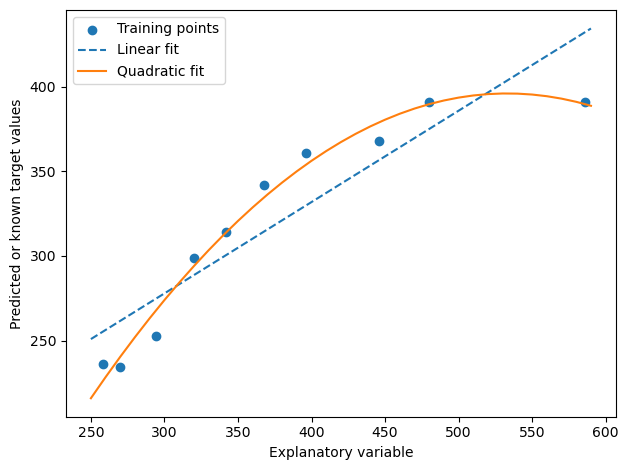

In [132]:
plt.scatter(X, y, label='Training points')
plt.plot(X_fit, y_lin_fit,
label='Linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit,
label='Quadratic fit')
plt.xlabel('Explanatory variable')
plt.ylabel('Predicted or known target values')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [133]:
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)
print('Training MSE linear: %.3f, quadratic: %.3f' % (
    mean_squared_error(y, y_lin_pred),
    mean_squared_error(y, y_quad_pred)))
print('Training R^2 linear: %.3f, quadratic: %.3f' % (
    r2_score(y, y_lin_pred),r2_score(y, y_quad_pred)))


Training MSE linear: 569.780, quadratic: 61.330
Training R^2 linear: 0.832, quadratic: 0.982


__Let us revisit the LSTAT (Percentage of lower status of the population) feature and the relation with the housing price__

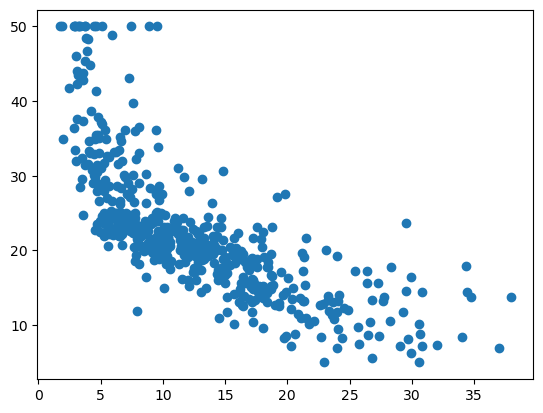

In [134]:
plt.scatter(df['LSTAT'],df['MEDV'])

In [135]:
X = df[['LSTAT']].values
y = df['MEDV'].values

regr = LinearRegression()

# create non-linear features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# fit features
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))



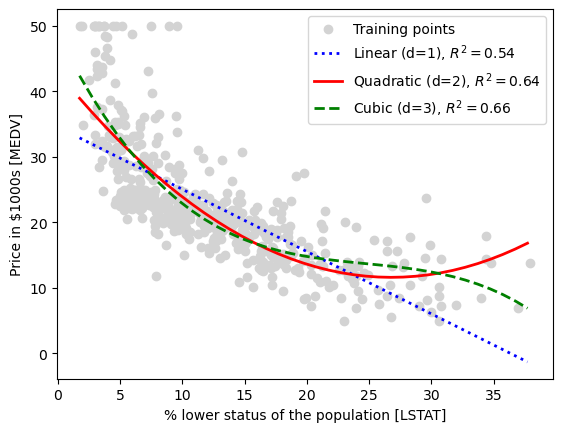

In [136]:
# plot results
plt.scatter(X, y, label='Training points', color='lightgray')
plt.plot(X_fit, y_lin_fit,
         label='Linear (d=1), $R^2=%.2f$' % linear_r2,
         color='blue',lw=2, linestyle=':')
plt.plot(X_fit, y_quad_fit,
        label='Quadratic (d=2), $R^2=%.2f$' % quadratic_r2,
        color='red', lw=2, linestyle='-')
plt.plot(X_fit, y_cubic_fit,
         label='Cubic (d=3), $R^2=%.2f$' % cubic_r2,
         color='green',lw=2,linestyle='--')

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper right')
plt.show()

- Cubic fit captures the LSTAT and MEDV relationship better than quadratic and linear regression. 
- Adding more polynomial features increases the complexity of the model and may cause overfitting

## Dealing with non-linear relationships using RF

- random forest: ensemble of multiple decision tress; sum of piecewise linear function
- In DT algorithm, the input data is divided into smaller regions that become more manageable



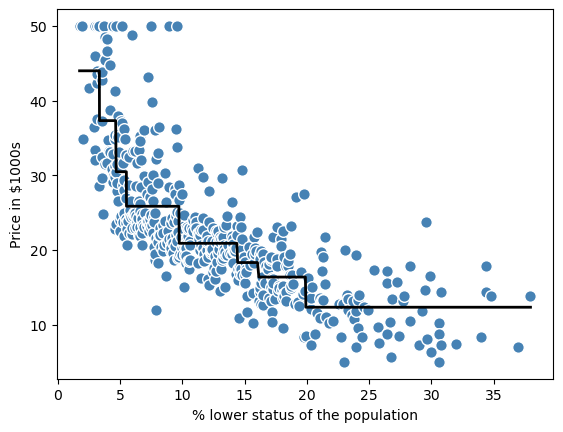

In [140]:
from sklearn.tree import DecisionTreeRegressor
X = df[['LSTAT']].values
y = df['MEDV'].values

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X,y)

sort_idx = X.flatten().argsort()

lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel("% lower status of the population")
plt.ylabel('Price in $1000s')
plt.show()